In [1]:
import os
import sys
sys.path.append("..")
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
merge_which = "trypsin_lysc"
merge_tab = f"/data2/yejb/prosit/figs/fig235/round1/{merge_which}/"

tab_before = f"/data2/yejb/prosit/figs/fig235/round1/{merge_which}/percolator/before"
tab_after = f"/data2/yejb/prosit/figs/fig235/round1/{merge_which}/percolator/after"

fake_ids = os.path.join(merge_tab, "fake_decoys.txt")

In [3]:
all_ids = pd.read_csv(fake_ids, sep='\t')
all_ids = all_ids[all_ids.columns[1]].to_list()

In [8]:
name = "sa"
before_sa = pd.read_csv(os.path.join(
    tab_before,
    f"{name}_target.psms"
), sep='\t')

after_sa = pd.read_csv(os.path.join(
    tab_after,
    f"{name}_target.psms"
), sep='\t')

psmid1 = set(before_sa["PSMId"].to_list())
psmid2 = set(after_sa["PSMId"].to_list())
left_target = []
for a in all_ids:
    if a in psmid1 and a in psmid2:
        left_target.append(a)
print(len(left_target))
left_target = set(left_target)

4998


In [9]:
before_fdr = before_sa[before_sa['PSMId'].apply(lambda x: x in left_target)]['q-value'].to_numpy()
after_fdr = after_sa[after_sa['PSMId'].apply(lambda x: x in left_target)]['q-value'].to_numpy()

In [10]:
print((before_fdr < 0.01).sum()/(before_sa['q-value']< 0.01).sum(),
      (after_fdr < 0.01).sum()/(after_sa['q-value']< 0.01).sum())

0.00022910257249459973 0.000404195431420044


In [11]:
fdr = 0.01
print((before_fdr < fdr).sum(),
      (before_sa['q-value']< fdr).sum(),
      (after_fdr < fdr).sum(),
      (after_sa['q-value']< fdr).sum())

77 336094 138 341419


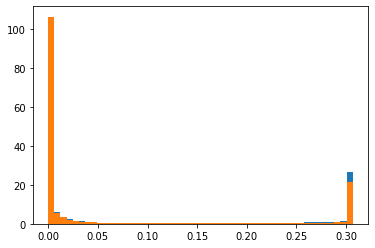

In [51]:
see = plt.hist(before_fdr, bins=50, density=True)
see = plt.hist(after_fdr, bins=50, density=True)

In [14]:
len(after_sa)

507711